In [1]:
import os
import sys
import fnmatch
import pandas as pd
from os.path import isfile, join
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import magcolloids as mgc

sys.path.insert(0, '../icenumerics')

import icenumerics as ice

# Fast Vertex Count

In this script, I analyze the first output of the simulation in order to see what's coming out. Only one run is analyzed. 

In [2]:
data_directory = "/home/carolina/CairoLattice_ACI_PROJECT/Scripts/Output_Script-10.0"

In [3]:
Shakti = []
for file in os.listdir(data_directory):
    if fnmatch.fnmatch(file, 'vertices_evolution.dat'):
        print(file)
        Shakti.append(pd.read_csv(join(data_directory,file), sep = "\t", index_col = [0,1])) 
        
keys_Shakti = []
for i in range(len(Shakti)):
    keys_Shakti.append(i)

vertices_evolution.dat


In [4]:
Shakti_exp = pd.concat(Shakti, keys = keys_Shakti)

In [5]:
Shakti_exp

x    y  coordination   dx   dy
  frame charge                                  
0 0     -4       21   21            21   21   21
        -3       95   95            95   95   95
        -2      100  100           100  100  100
        -1      311  311           311  311  311
         0      189  189           189  189  189
...             ...  ...           ...  ...  ...
  240   -2      304  304           304  304  304
        -1      170  170           170  170  170
         0       77   77            77   77   77
         1      446  446           446  446  446
         3      184  184           184  184  184

[101 rows x 5 columns]

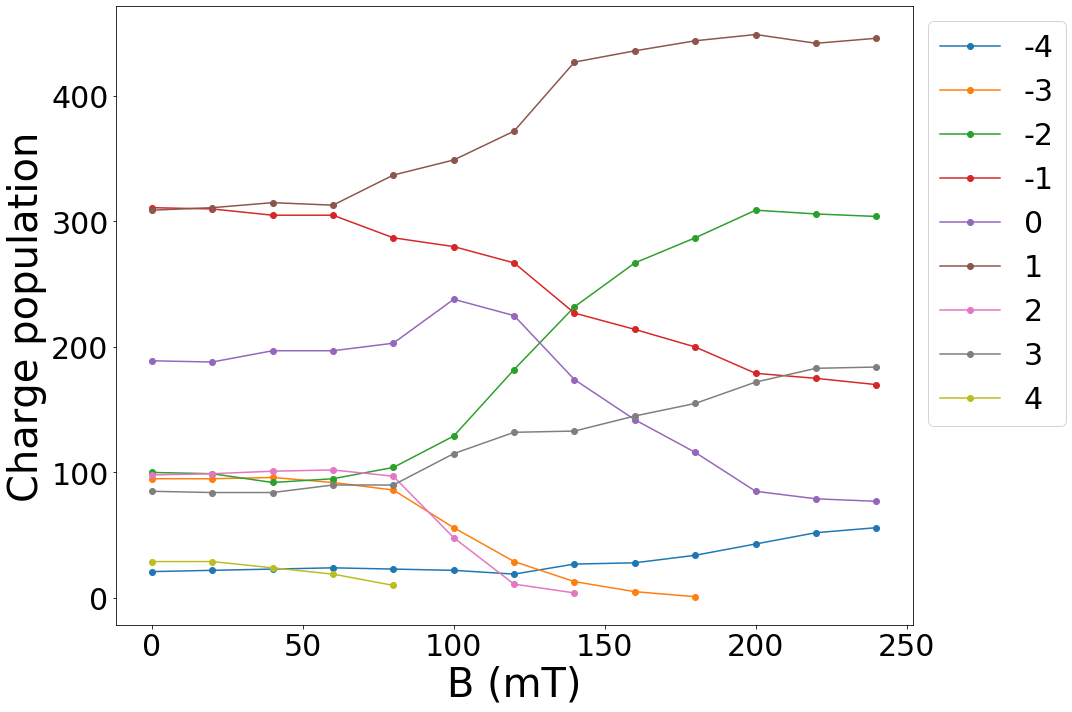

In [6]:
fig, ax1 = plt.subplots(figsize=(15,10))

for typ_m, mtype in Shakti_exp.groupby('charge'):
    
    plt.plot(mtype.index.get_level_values("frame"), mtype["x"],'-o', label = typ_m)

ax1.tick_params(axis='y', labelsize=30)
ax1.tick_params(axis='x', labelsize=30)  

ax1.legend(fontsize = 30, bbox_to_anchor=(1, 1))
ax1.set_xlabel('B (mT)', size = 40)
ax1.set_ylabel('Charge population', size = 40)

plt.tight_layout()